# Exploring Data BankChurn Analysis II

# Level 3 Further Analysis Questions

## Importing the necessary libraries 

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [2]:
# Checking the library versions 
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)

Pandas version:  1.4.4
Seaborn version:  0.11.2
Matplotlib version:  3.5.2


In [3]:
# Ensure that the data file is in the current working directory as that of the Jupyter notebook

df = pd.read_csv('DS1_C6_S1_BankChurn_Data_Concept (1).csv') # read_csv: inbuilt function of pandas to read files 

# =============================================================


## 9. Present the details of Total Transaction Amount of existing customers who are high school pass outs. 

In [23]:
data=df[(df['Attrition_Flag']=='Existing Customer') & (df['Education_Level']=='High School')]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,1538,36,0.048
18,806160108,Existing Customer,61,M,1,High School,Married,$40K - $60K,Blue,56,2,2,3,3193.0,2517,676.0,1336,30,0.788
22,784725333,Existing Customer,41,M,3,High School,Married,$40K - $60K,Blue,33,4,2,1,4470.0,680,3790.0,931,18,0.152


In [86]:
mean=data['Total_Trans_Amt'].mean()
Q1=data['Total_Trans_Amt'].quantile(0.25)
Q3=data['Total_Trans_Amt'].quantile(0.75)
IQR=Q3-Q1
LF=Q1-(1.5*IQR)
UF=Q3+(1.5*IQR)
    
for i in data['Total_Trans_Amt']:
    if (i<LF) or (i>UF):
        data['Total_Trans_Amt'].replace(to_replace=i,value=mean,inplace=True)
    else:
        pass

In [88]:
print('Min : ',data['Total_Trans_Amt'].min())
print('Max : ',data['Total_Trans_Amt'].max())
bins=[500,2500,4500,6500,8500]
labels=['500-2500','2500-4500','4500-6500','6500-8500']
labels

Min :  510.0
Max :  8301.0


['500-2500', '2500-4500', '4500-6500', '6500-8500']

In [89]:
data= pd.cut(data['Total_Trans_Amt'],bins=bins,labels=labels)

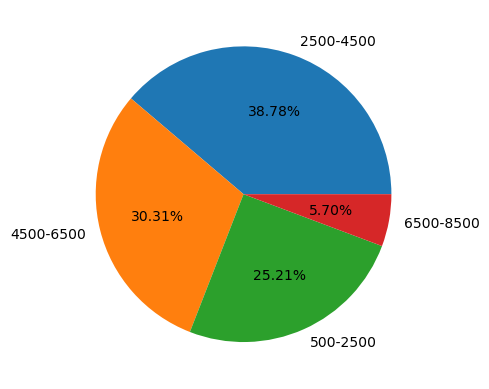

In [90]:
plt.pie(data.value_counts(),autopct="%0.2f%%",labels=data.value_counts().keys());

### ***Intepretation :-39 % of customers having transaction amount in the range $2500-4500

## 10. Analysis of the education level of the customers who are with the bank and those who left

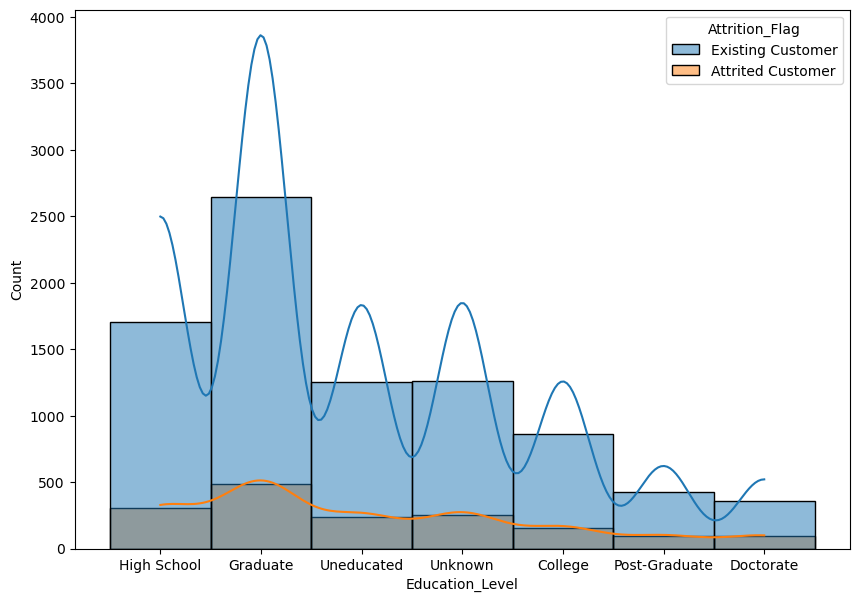

In [27]:
fig,ax=plt.subplots(figsize=(10,7))
sns.histplot(data=df,x='Education_Level',hue='Attrition_Flag',kde=True);

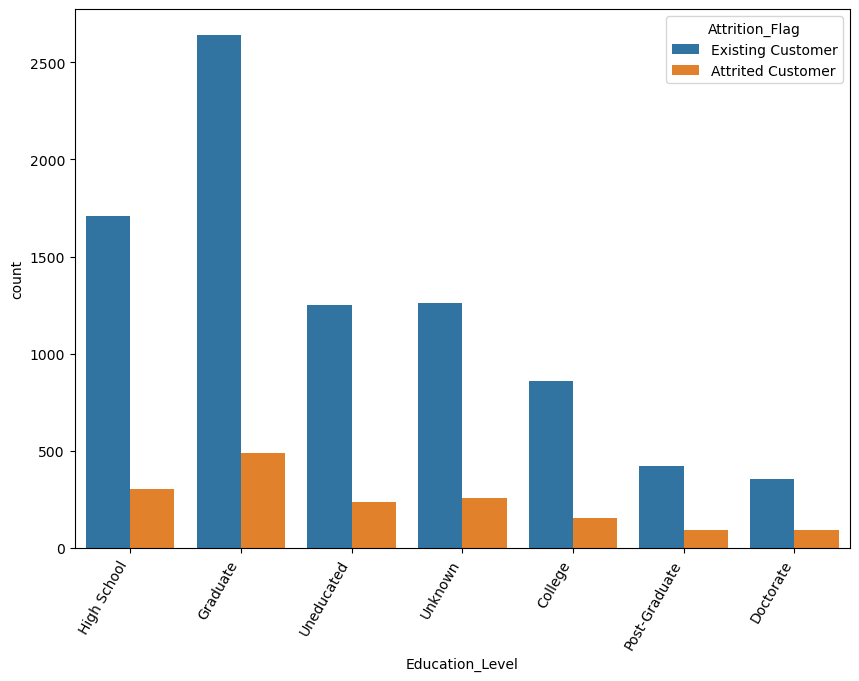

In [28]:
fig, ax = plt.subplots(figsize= (10, 7))
ax=sns.countplot(data=df,x='Education_Level',hue='Attrition_Flag');
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60 , ha = "right");

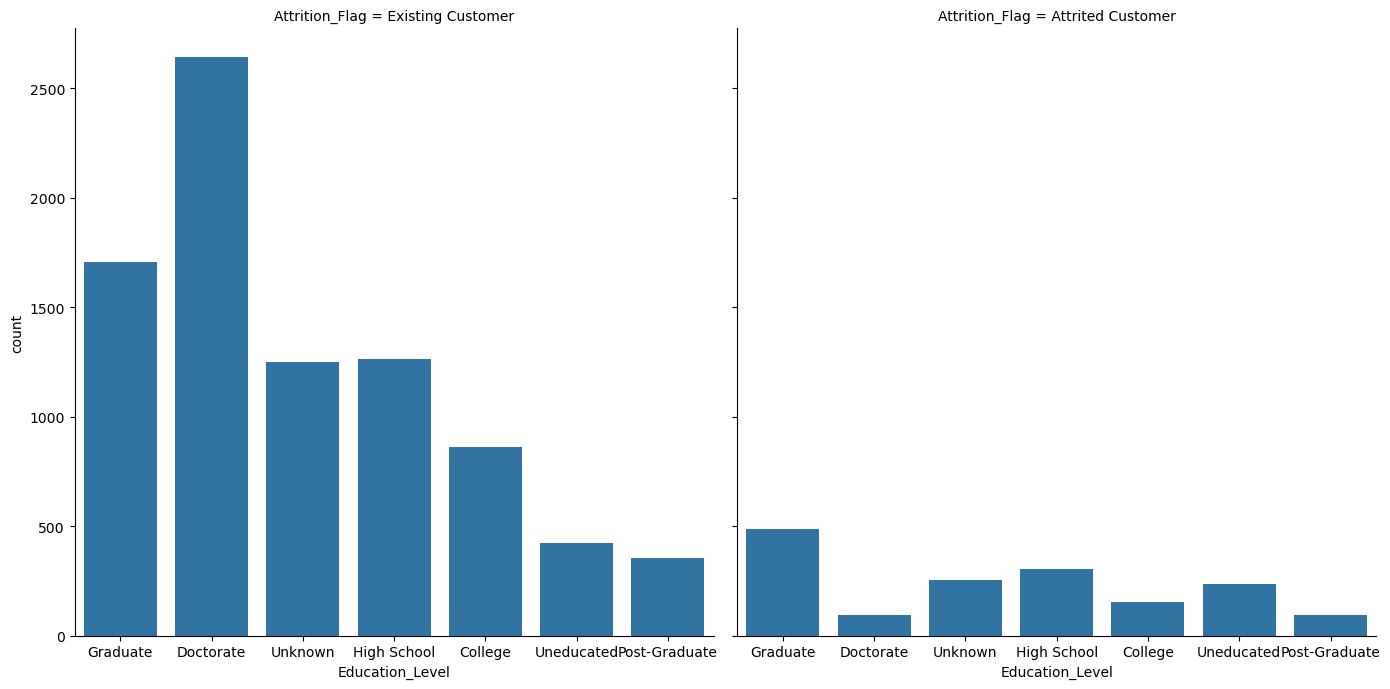

In [29]:
import warnings
warnings.filterwarnings('ignore')

g = sns.FacetGrid(df, col ="Attrition_Flag", height = 7)
g.map(sns.countplot, "Education_Level")
plt.show()

Graduate         2641
High School      1707
Unknown          1263
Uneducated       1250
College           859
Post-Graduate     424
Doctorate         356
Name: Education_Level, dtype: int64
Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: Education_Level, dtype: int64


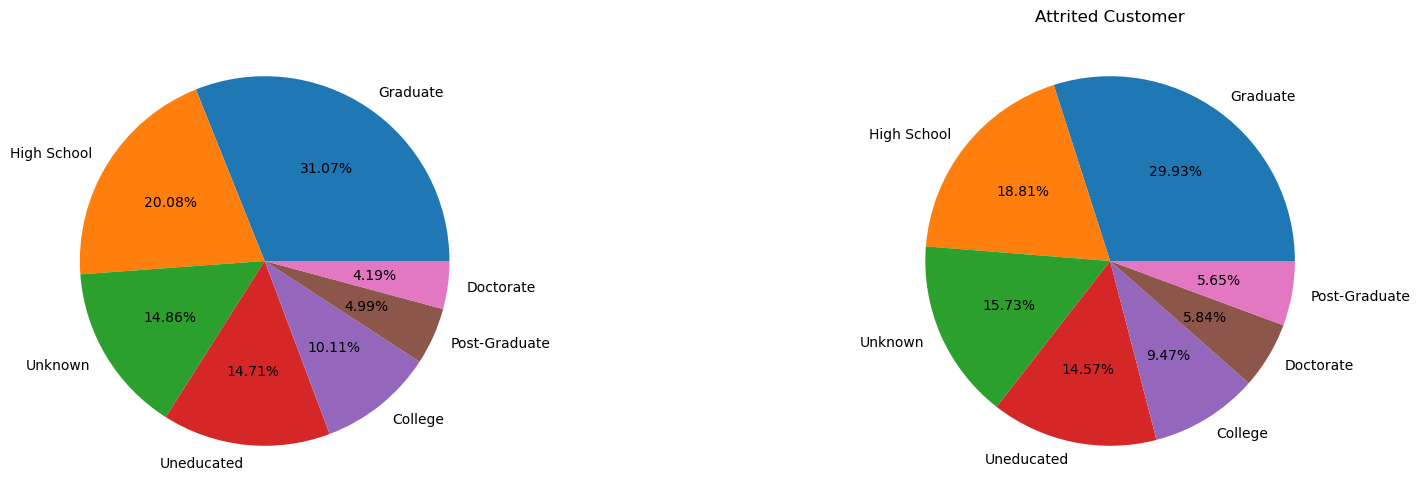

In [30]:
data1=df["Education_Level"][df["Attrition_Flag"]=='Existing Customer'].value_counts()
print(data1)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data1.keys()
ax[0].pie(x = data1,  labels = labels,autopct='%0.2f%%')

data2=df["Education_Level"][df["Attrition_Flag"]=='Attrited Customer'].value_counts()
print(data2)
labels =data2.keys()
ax[1].pie(x = data2,  labels = labels,autopct='%0.2f%%') 
plt.title('Attrited Customer')

plt.show()

In [31]:
df["Education_Level"].groupby(df["Attrition_Flag"]).value_counts()

Attrition_Flag     Education_Level
Attrited Customer  Graduate            487
                   High School         306
                   Unknown             256
                   Uneducated          237
                   College             154
                   Doctorate            95
                   Post-Graduate        92
Existing Customer  Graduate           2641
                   High School        1707
                   Unknown            1263
                   Uneducated         1250
                   College             859
                   Post-Graduate       424
                   Doctorate           356
Name: Education_Level, dtype: int64

### Interpretation :- 30% of customers who are with bank are graduates and 31% of customers who are attrited were graduate.

## 11. Analysis of Transaction Amount (mean, median, and mode) made by the existing customers and comparing it with those who are not existing

In [32]:
def fun(col):
    data=df[df['Attrition_Flag']==col]
    print('Mean of transaction amount made by {} is {}'.format(col,data['Total_Trans_Amt'].mean()))
    print('Median of transaction amount made by {} is {}'.format(col,data['Total_Trans_Amt'].median()))
    print('Mode of transaction amount made by {} is {}'.format(col,data['Total_Trans_Amt'].mode()[0]))

In [33]:
fun('Attrited Customer')

Mean of transaction amount made by Attrited Customer is 3095.025814382299
Median of transaction amount made by Attrited Customer is 2329.0
Mode of transaction amount made by Attrited Customer is 2108


In [34]:
fun('Existing Customer')

Mean of transaction amount made by Existing Customer is 4654.655882352941
Median of transaction amount made by Existing Customer is 4100.0
Mode of transaction amount made by Existing Customer is 4253


## 12. What is the average utilization ratio of the existing customers?

In [35]:
Existing = df[(df["Attrition_Flag"]=="Existing Customer")]
print('Average utilization ratio of the existing customers is ',Existing['Avg_Utilization_Ratio'].mean())

Average utilization ratio of the existing customers is  0.2964117647058822


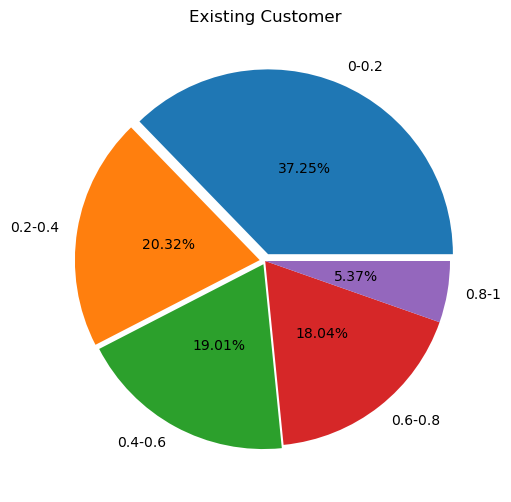

In [36]:
Existing = df[(df["Attrition_Flag"]=="Existing Customer")] 
bins =     [0,0.2,0.4,0.6,0.8,1]                                            
labels =  ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]                   
data = pd.cut(Existing["Avg_Utilization_Ratio"], bins = bins, labels = labels)
data = data.value_counts()                                                     
pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,explode = [0.04, 0.03, 0.02, 0,0] ,labels =data.index, pctdistance = 0.5,autopct='%0.2f%%') 
                                                                                            
plt.title("Existing Customer")
plt.show()

### ***Interpretation :- 37% existing customers have average utilization ratio in the range 0-0.2

## 13. Analysis of the churned out customers who hold the blue card with respect to their income categories

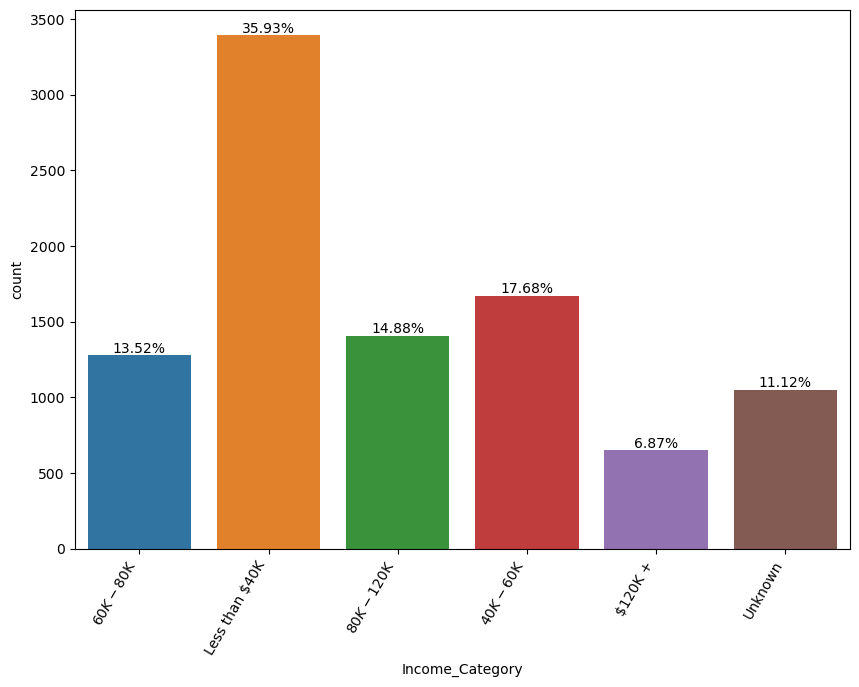

In [37]:
data_df = df[(df["Attrition_Flag"] == 'Attrited Customer') | (df['Card_Category'] == 'Blue')]
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.countplot(data=data_df,x=data_df['Income_Category'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60 , ha = "right");
for bar in ax.patches:                                              
    percentage = f"{round((bar.get_height() /len(data_df))*100, 2)}%"          
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
plt.show()

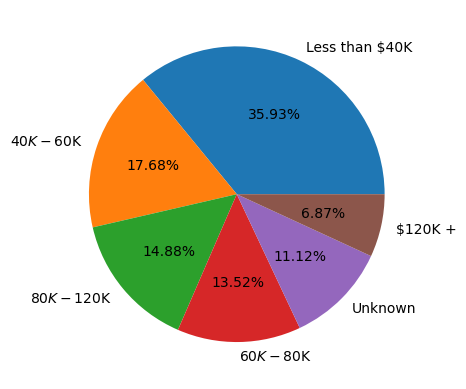

In [38]:
d=data_df['Income_Category'].value_counts()
plt.pie(x=d.values,labels=d.keys(),autopct='%0.2f%%')
plt.show()

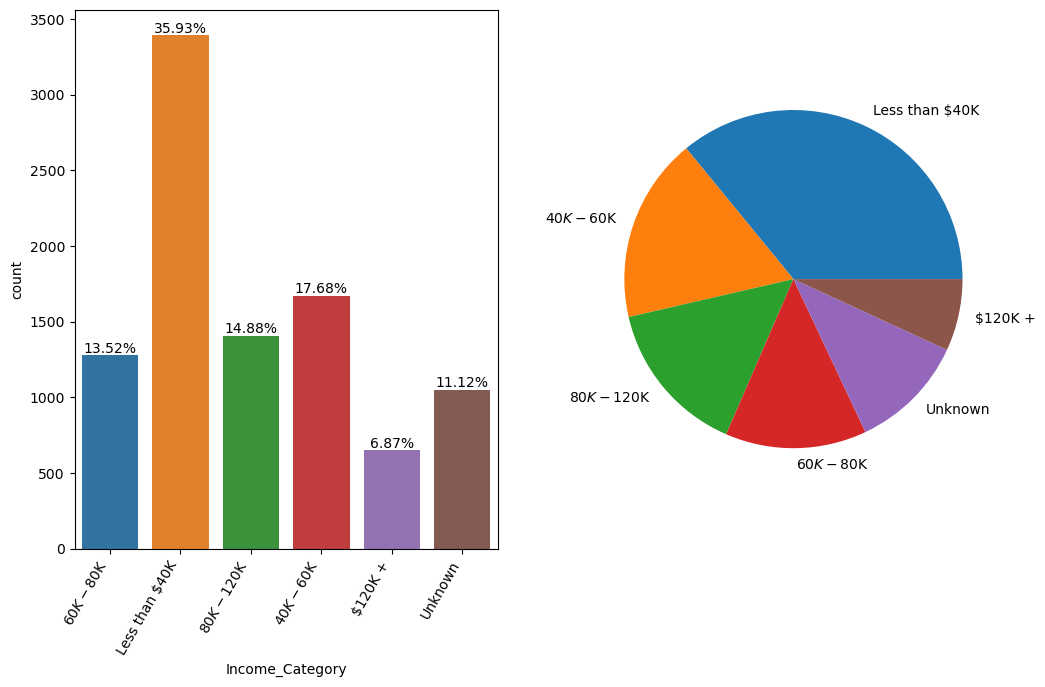

In [39]:
data_df = df[(df["Attrition_Flag"] == 'Attrited Customer') | (df['Card_Category'] == 'Blue')]
fig,ax=plt.subplots(1,2,figsize=(12,7))
a=sns.countplot(data=data_df,x=data_df['Income_Category'],ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 60 , ha = "right");
for bar in a.patches:                                              
    percentage = f"{round((bar.get_height() /len(data_df))*100, 2)}%"          
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    a.annotate(percentage, (x, y), va = "bottom", ha ="center" )   



d=data_df['Income_Category'].value_counts()
plt.pie(x=d.values,labels=d.keys());
plt.show()

### ***Interpretation :-36% of churned out customers holding blue cards have income less than 40k, 18% customers have income in the range 40k-60k

## 14. Analysis of transaction amount (mean, median, mode) for blue card customers who are no longer with the bank and comparing it with the existing customers

In [40]:
data_df = df[(df["Attrition_Flag"] == 'Attrited Customer') | (df['Card_Category'] == 'Blue')]
print(data_df.isnull().sum())
print('Mean of transaction amount made by Attrited customers is {}'.format(data_df['Total_Trans_Amt'].mean()))
print('Median of transaction amount made by Attrited customers is {}'.format(data_df['Total_Trans_Amt'].median()))
print('Mode of transaction amount made by Attrited customers is {}'.format(data_df['Total_Trans_Amt'].mode()[0]))

CLIENTNUM                    0
Attrition_Flag               0
Customer_Age                 0
Gender                      82
Dependent_count              0
Education_Level              0
Marital_Status               0
Income_Category              0
Card_Category               20
Months_on_book               0
Total_Relationship_Count     0
Months_Inactive_12_mon       0
Contacts_Count_12_mon        0
Credit_Limit                54
Total_Revolving_Bal          0
Avg_Open_To_Buy              0
Total_Trans_Amt              0
Total_Trans_Ct               0
Avg_Utilization_Ratio        0
dtype: int64
Mean of transaction amount made by Attrited customers is 4236.04639339053
Median of transaction amount made by Attrited customers is 3862.0
Mode of transaction amount made by Attrited customers is 4253


In [41]:
data_df = df[(df["Attrition_Flag"] == 'Existing Customer') | (df['Card_Category'] == 'Blue')]
print(data_df.isnull().sum())
print('Mean of transaction amount made by Attrited customers is {}'.format(data_df['Total_Trans_Amt'].mean()))
print('Median of transaction amount made by Attrited customers is {}'.format(data_df['Total_Trans_Amt'].median()))
print('Mode of transaction amount made by Attrited customers is {}'.format(data_df['Total_Trans_Amt'].mode()[0]))

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                       93
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               112
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64
Mean of transaction amount made by Attrited customers is 4397.7460253974605
Median of transaction amount made by Attrited customers is 3897.0
Mode of transaction amount made by Attrited customers is 4253


## 15. How is the credit limit of the blue card customers affecting the churn?

In [42]:
data_df = df[(df['Card_Category'] == 'Blue')]

In [43]:
print(data_df['Credit_Limit'].isnull().sum())

54


In [44]:
mode=data_df['Credit_Limit'].mode()[0]
data_df['Credit_Limit'].fillna(mode,inplace=True)
print(data_df['Credit_Limit'].isnull().sum())

0


In [45]:
print(data_df['Credit_Limit'].nunique())

5831


In [46]:
l =  ['Low Credit Limit','Medium Credit Limit','High Credit Limit']                   
data = pd.cut(x=data_df["Credit_Limit"], bins = 3, labels = l)
data_df['Credit_Limit_Grp']=data
data_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Credit_Limit_Grp
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061,Medium Credit Limit
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105,Low Credit Limit
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000,Low Credit Limit
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760,Low Credit Limit
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000,Low Credit Limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,3082.0,14596,120,0.164,Low Credit Limit
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462,Low Credit Limit
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511,Low Credit Limit
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,10291,60,0.000,Low Credit Limit


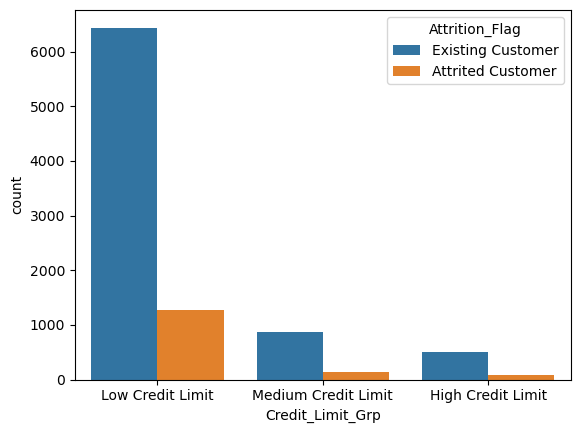

In [47]:
sns.countplot(data_df['Credit_Limit_Grp'],hue=data_df['Attrition_Flag']);

### ***Interpretation :- Most of the customers holding blue cards and having low credit limit are still with bank 

## 16. Analysis of the dependent count with respect to the customers who have churned out and the customers who are still using the services

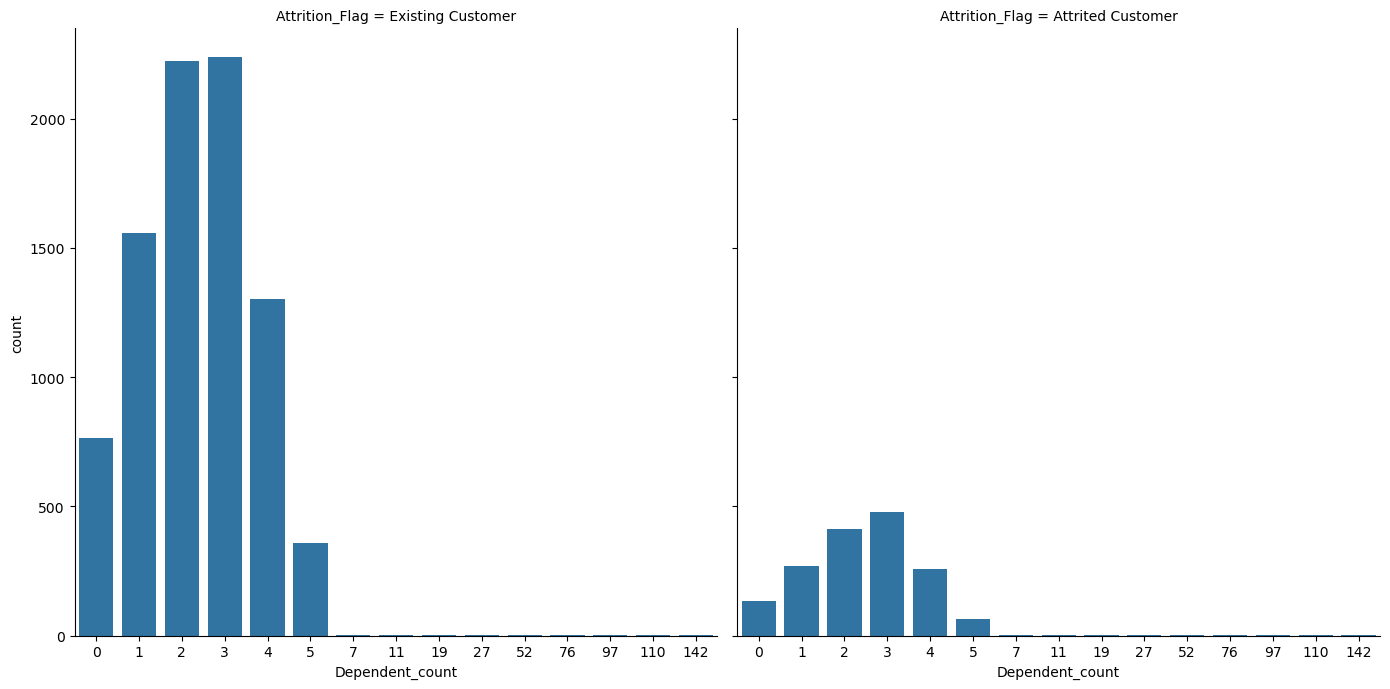

In [48]:
g = sns.FacetGrid(df, col = "Attrition_Flag", height = 7)
g.map(sns.countplot, "Dependent_count")
plt.show()

In [49]:
#Outlier Treatment

mean=round(df['Dependent_count'].mean(),0)
Q1=df['Dependent_count'].quantile(0.25)
Q3=df['Dependent_count'].quantile(0.75)
IQR=Q3-Q1
LF=Q1-(1.5*IQR)
UF=Q3+(1.5*IQR)
    
for i in df['Dependent_count']:
    if (i<LF) or (i>UF):
        df['Dependent_count'].replace(to_replace=i,value=mean,inplace=True)
    else:
        pass

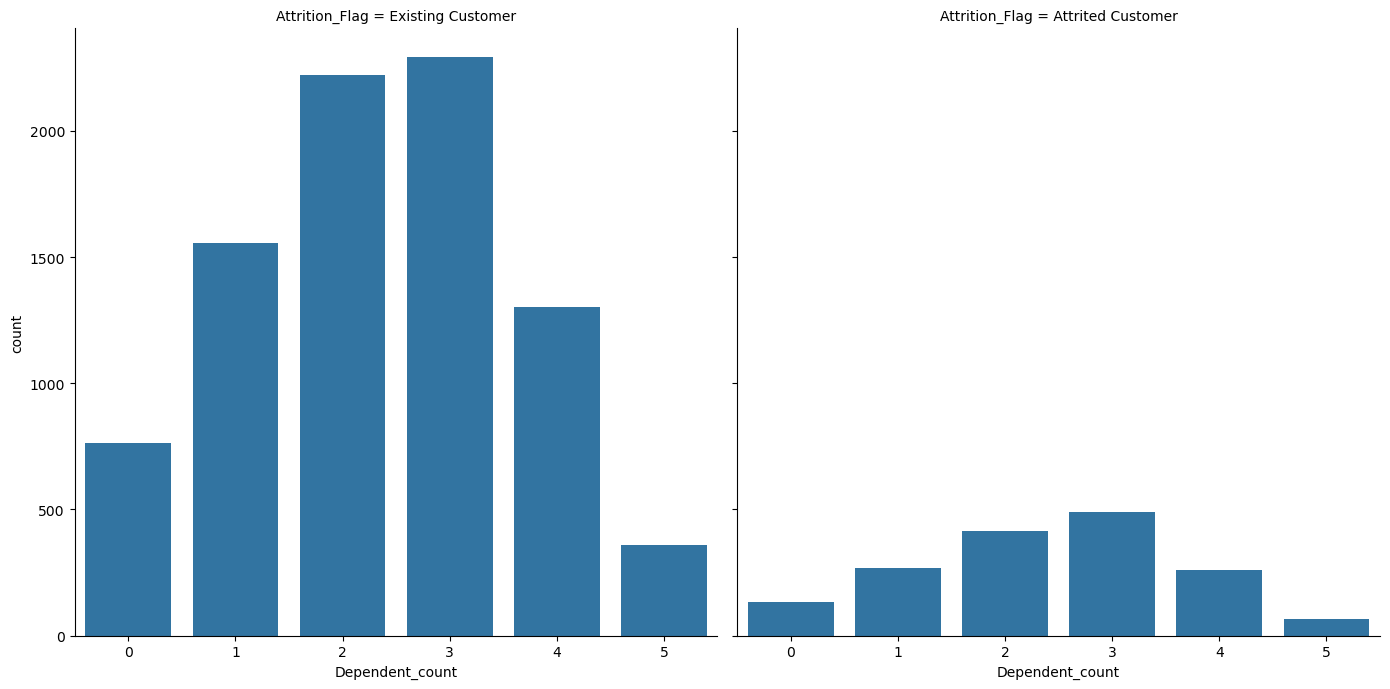

In [50]:
g = sns.FacetGrid(df, col = "Attrition_Flag", height = 7)
g.map(sns.countplot, "Dependent_count")
plt.show()

### ***Interpretation :- Customers who are churned out and still with the banks have 3 numbers of maximum Dependent counts.

## 17. Is there a relation between the credit limit and the attrition of the customers?

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

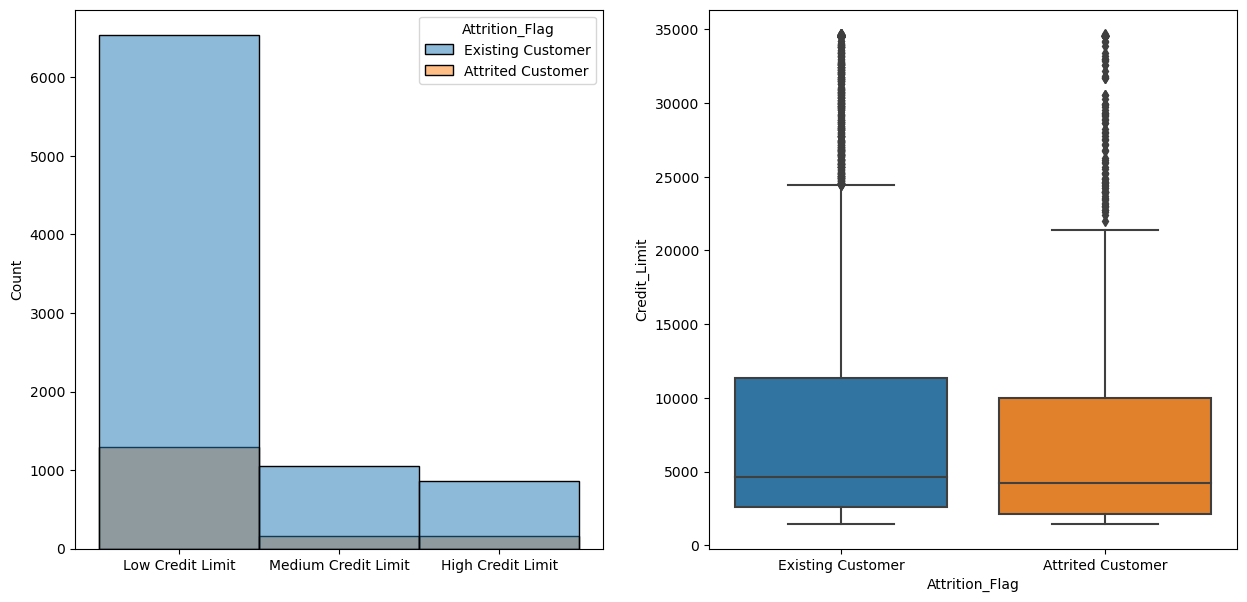

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
labels=['Low Credit Limit','Medium Credit Limit','High Credit Limit']
data=pd.cut(x=df['Credit_Limit'],bins=3,labels=labels)
a=sns.histplot(data=data,x=data.values,hue=df['Attrition_Flag'],ax=ax[0])
sns.boxplot(y = df["Credit_Limit"], x = df["Attrition_Flag"],ax=ax[1])

### ***Interpretation :- Average Credit Limit of Existing Customers and Attrited Customers is nearly same.

## 18. What is the average utilization ratio of the credit card for each age sub-group between 40 and 50? (We need to group the customers into 4 buckets between 40 and 50.)

In [81]:
bins=[39,42,44,46,48,50]
labels=['40-42','42-44','44-46','46-48','48-50']
data=df[(df['Customer_Age']>=40)&(df['Customer_Age']<=50)].reset_index()
data['age_group']=pd.cut(x=data['Customer_Age'],bins=bins,labels=labels)

In [82]:
data[['Customer_Age','age_group']].head(10)

,Customer_Age,age_group
0,45,44-46
1,49,48-50
2,40,40-42
3,40,40-42
4,44,42-44
5,48,46-48
6,42,40-42
7,44,42-44
8,48,46-48
9,41,40-42


In [83]:
data.groupby('age_group')['Avg_Utilization_Ratio'].mean().sort_values(ascending=False)

age_group
40-42    0.264974
44-46    0.263620
46-48    0.260133
48-50    0.252057
42-44    0.243505
Name: Avg_Utilization_Ratio, dtype: float64

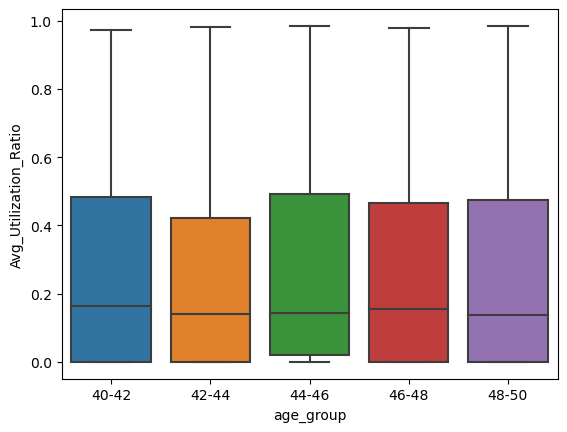

In [84]:
sns.boxplot(data=data,y='Avg_Utilization_Ratio',x='age_group');

## *** Interpretation: Customers in the Age group of 40-42,42-44 and 44-46 are having mean average utilization ratio of 0.26 whereas customers in the age group 46-48 and 48-50 are having average utization ratio of 0.25

## 19. How are the education level and income category affecting the customer churn?

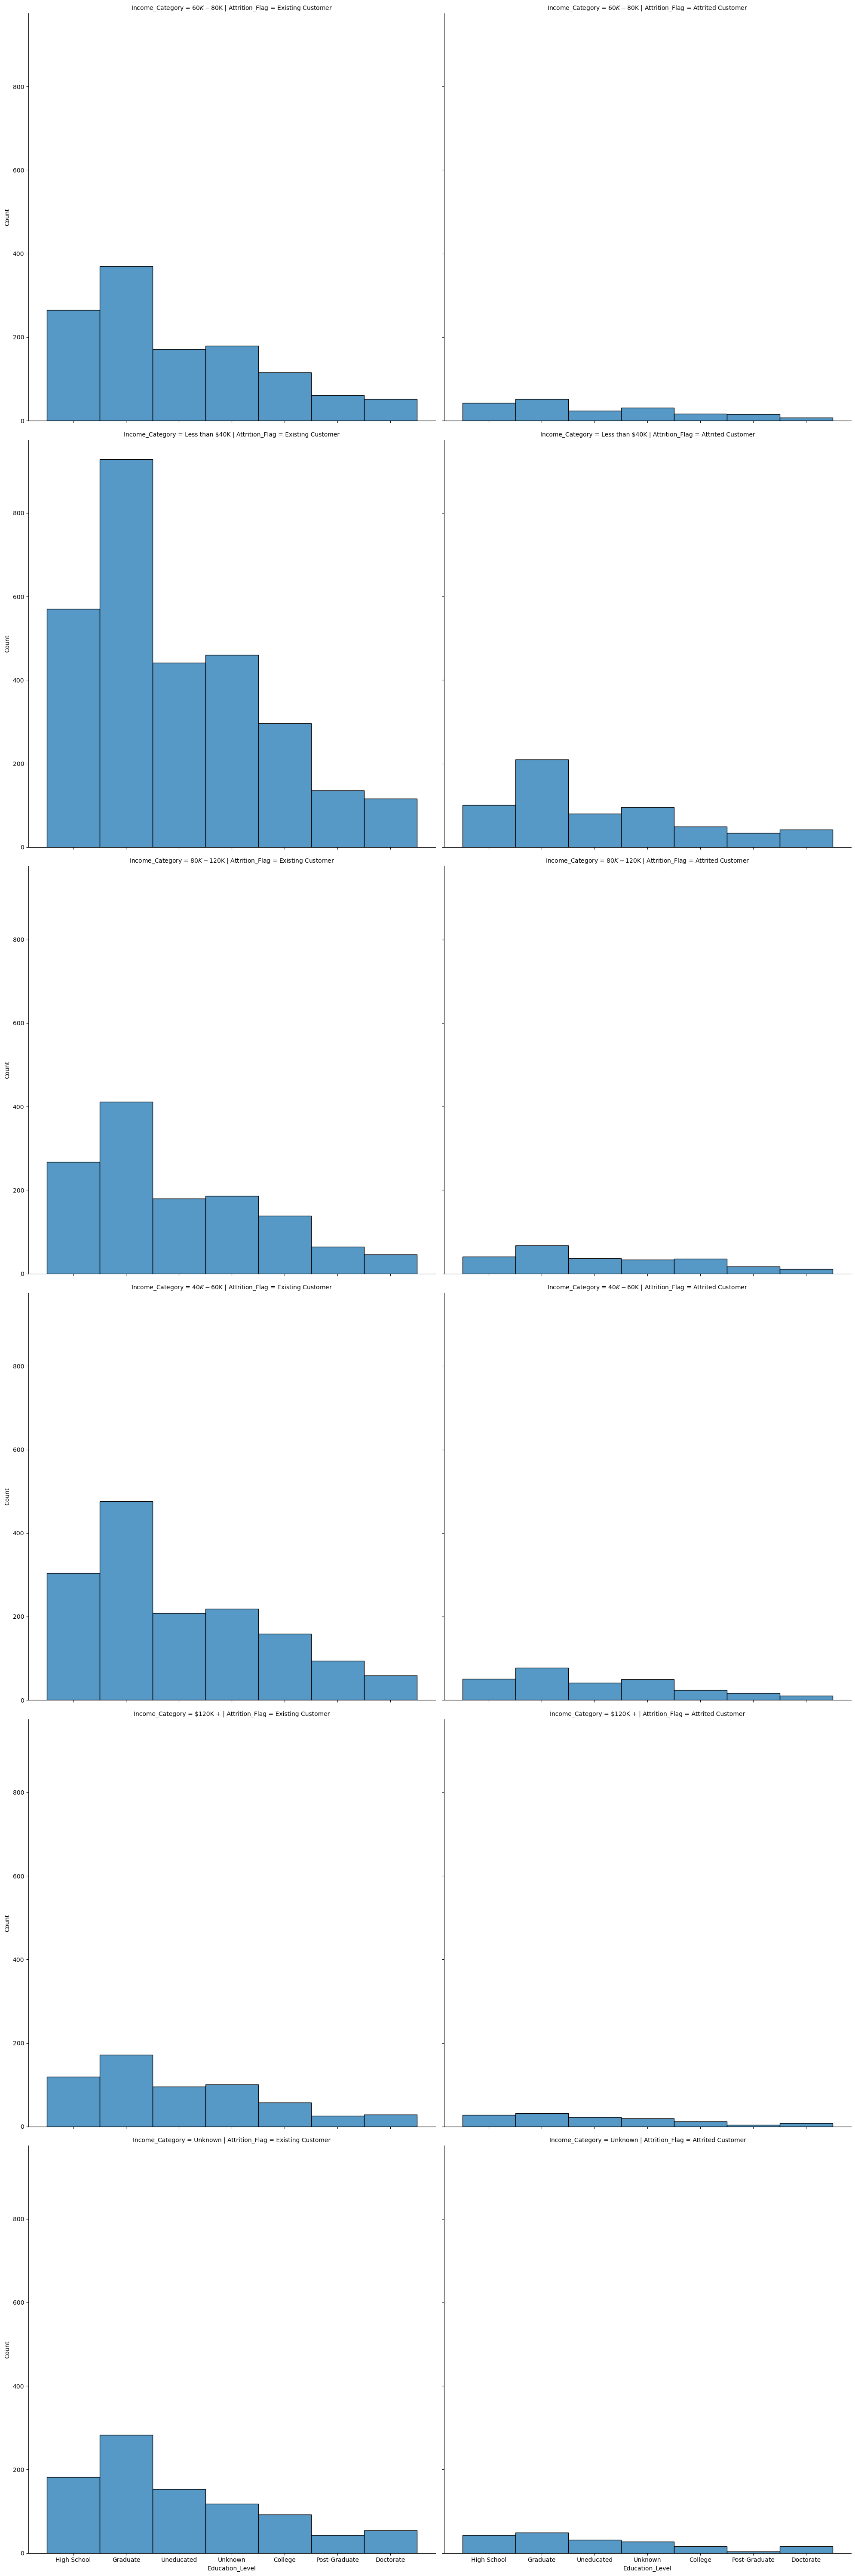

In [85]:
sns.displot(data = df, x = 'Education_Level', row='Income_Category',col='Attrition_Flag', height = 10);

## 20. Identify the churned out customers with high income category, high education level, and high credit limit.

In [55]:
print(df['Income_Category'].unique())
print(df['Education_Level'].unique())
print(df['Credit_Limit'].quantile(0.75))

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
11127.5


In [56]:
data=df[(df['Attrition_Flag']=='Attrited Customer')&(df['Income_Category']=='$120K +')&(df['Education_Level']=='Doctorate')&(df['Credit_Limit']>11127.5)]
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
2793,714967233,Attrited Customer,52,M,2,Doctorate,Married,$120K +,Blue,34,3,2,3,11188.0,0,11188.0,2109,47,0.000
6861,808747233,Attrited Customer,50,M,2,Doctorate,Married,$120K +,Silver,45,6,3,3,34516.0,0,34516.0,2573,55,0.000
9846,758753283,Attrited Customer,52,M,3,Doctorate,Married,$120K +,Blue,45,1,3,3,34516.0,550,33966.0,7341,71,0.016


## ***Interpretation : There are three attired customers having income greater than dollar 120K, Doctorate and Credit Limit 11127.5